# Hypothesis Testing

A [statistical hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) is a method of statistical inference used to decide whether the data at hand (which are likely the result of taking a sample) sufficiently support a particular hypothesis. 

In simple terms we make an assumption about the underlying probability distribution of the population.  We call this the [*null hypothesis*](https://en.wikipedia.org/wiki/Null_hypothesis).  Since we are dealing with a sample and the spread of the sample mean distribution is described by the standard error, the assumption that we end up making is the value of the population mean.  

Then we propose an alternative hypothesis.  The alternative hypothesis is important because it will ultimately tell us which end of our probability distribution we will look at to determine the cumulative probability, but we're getting ahead of ourselves.  At this point I will just say that the first time you learn this it feels like some circular logic, so you just have to do it a few times to see how it all fits together.

Once we have constructed our hypothetical distribution we simply see where our sample mean value falls on that distribution and what the cumulative probability is of getting that particular sample (or a more extreme value).  A low probability implies that our assumption about the underlying population (null hypothesis) is probably wrong.  

A [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) is performed when we don't know the population standard deviation.  We use the sample standard deviation instead.  Then we use the t-statistic instead of a z-statistic, and calculate our p-value using the t-distribution.

When performing a t-test we are actually normalizing our data to fit on a t-distribution, so it doesn't feel like we are constructing a probability distribution.  But we are using the value that we assume in our null hypothesis to convert the sample into t-space, so we are in fact constructing a distribution.  

Just like the confidence intervals we studied last week, this entire process rests on the central limit theorem.  We know our sample mean distribution will be normally distributed, and since we don'e actually know the standard deviation we use the t-distribution to account for the added uncertainty of using the sample standard deviation as a proxy.

In todays lesson, our null hypothesis will be that our population average ($\mu$) is equal to a particular value.  Our alternative hypothesis will be that the population average is either lower or higher than that paricular value.  We will use a slightly different test for each of these alternative hypothesis but the overall method will be the same.

In [759]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

## Left-Tailed Test

A left-tailed test will allow us to check and see if the mean of a population is likely to be less than a hypothetical value.

Let's work through a brief example to determine if the mean value of a process is equal to a hypothesised value.

Suppose we work for a chemical company on the filling process.  We are testing some new equipment so we don't have a great estimate for the mean or standard deviation. Our goal is to get 500 grams of chemical into each container.  We take 10 measurements and we would like to know if our population mean is less than 500 grams.

First we set up our null hypthesis.
$$\Large H_0: \mu=500g$$

The null hypothesis is the default assumption and the value that we use to construct our underlying populatin distribution.  If our data contradicts this assumption then we reject this default hypthesis in favor of the alternative hypothesis.  In this case the alternative hypothesis is:

$$ \Large H_a: \mu < 500g$$

Now that we have our null and alternative hypothesis, we can follow some basic steps to test and see if it is likely that our null hypothesis is correct.

1. Calculate sample mean
2. Calculate t-value using the sample mean, the standard error of the mean using sample standard deviation, and the population mean proposed by the null hypthesis.
3. Calculate the cumulative probability up to that t-value using the correct DOF for the number of measurements in the sample.  This will tell us the likelihood of getting a result at least as extreme as our sample if the null hypthesis was true.
4. Compare this cumulative probability to our required level of significance.

Basically, the p-value is going to tell us how likely it is that the null hypothesis is true based on the sample.  

For the t-statistic in step (2), we use the form which describes the sample distribution.

$$\Large t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

#### P-Value Visualization

Before we begin our analysis, we'll make a quick function that will help us visualize the p-value.  We simply take the code from our exploration of cumulative probability distribution and package it in a function which takes the t-value and degree of freedom as input.

In [760]:
def tcdf_plot_left(t, nu):
    """This function visualizes the cumulative 
    probability of the t-distribution up to a defined
    t-value.  This is the p-value that will allow us
    to make an inference (or not)."""
    
    # make the figure 
    plt.figure(figsize=(10, 6))

    # outcome space
    x = np.linspace(-5, 5, num=500)

    # probability distribution
    f = st.t.pdf(x, nu)
    plt.plot(x, f, label="t-distribution", color="blue")
    
    # fill in cumulative region (p-value)
    x_fill = np.linspace(-5, t, num=500)
    f_fill = st.t.pdf(x_fill, nu)
    plt.fill_between(x_fill, f_fill, color="red", alpha=0.5, label="Cumulative Probability (p-value)")

    # Add gridlines
    plt.grid(True, linestyle="--", alpha=0.7)

    # Add labels and title
    plt.title("Cumulative Probability of t-Distribution", fontsize=16)
    plt.xlabel("t-value", fontsize=14)
    plt.ylabel("Probability Density", fontsize=14)

    # Add legend
    plt.legend(fontsize=12)

    # Format plot
    plt.ylim(0, max(f) + 0.05)
    plt.xlim(-5, 5)
    plt.show()

Now let's use our function to gain some intution about how the t-statistic impacts p-value.  In this case we are testing for values below the assumed population mean in the null hypothesis.  The p-value is the cumulative probability shown in red.  Test several values of `t`.  Looking at the t-statistic above, what could happpen to make `t` higher or lower?  Keep in mind that $\mu$ will be a constant because we have made an assumption about it's value.

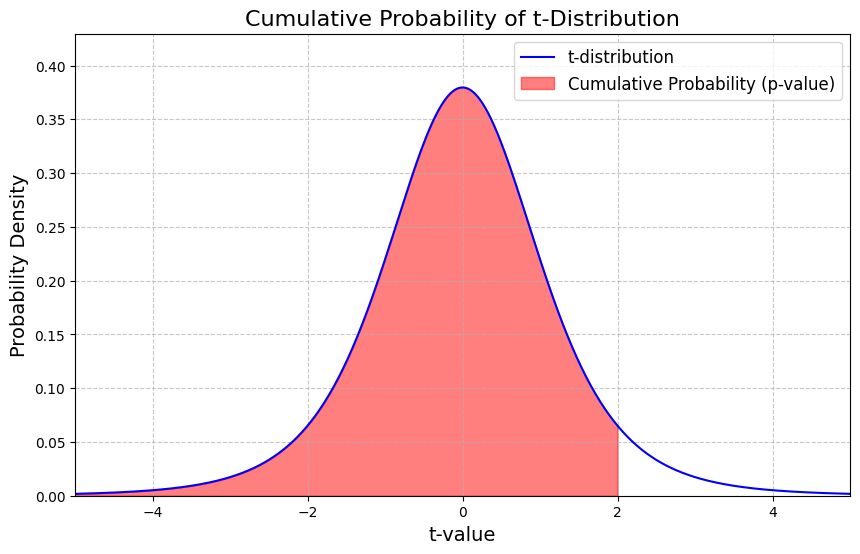

In [761]:
t = 2
nu = 5

tcdf_plot_left(t,nu)

We'll write a short function to calculate the p-value using a left-tailed test.  This way we can easily test it one multiple samples.

To calculate the sample mean we can use `x_bar = np.mean(sample)`.

To calculate the sample standard deviaton we can use `np.std(sample,ddof=1)`.  This will use the unbiased estimator.  If we leave out the `ddof=1` then it will divide by *n* instead of *n-1*.  MATLAB uses the *n-1* by default.

To count the number of elements in the sample list we can use the `len()` function.  This will be useful for automaticall calculating $n$ and $\nu$.

Once we have calculated the t-statistic, we can find the cumulative probability of landing on or below that value using the code `p = st.t.cdf(t,nu)`.

In [762]:
def left_tailed_t_test(sample,mu_0):
    """
    This function calculates a p-value using a 
    left-tailed t-test for the population mean.  
    
    It takes two values as input.
    
    sample: a list of numbers
    mu_0: The value of the null hyothesis for population mean
    
    """    
    # sample mean
    sample_mean = np.mean(sample)

    # sample standard deviation with n-1 in the denominator
    sample_std = np.std(sample, ddof=1)
    
    # number of measurements (length of sample list)
    sample_len = len(sample) 
    
    # degree of freedom
    # ? 
    nu = sample_len - 1

    # t-value for sample mean distribution (using standard error)
    t_numerator = sample_mean - mu_0
    t_denomenator = sample_std / (np.sqrt(sample_len))
    t_value = t_numerator / t_denomenator
    
    
    # calculate the cummulative probability of landing
    # on or below this t-value
    p_value = st.t.cdf(t_value, nu)
    p_value = np.round(p_value, 5)
    
    # return three values
    return t_value, p_value, nu

#### Low Sample

Let's consider our first batch of 10 measurements.

In [763]:
sample = [487, 495, 482, 474, 489, 499, 492, 485, 483, 497]

Almost all of our measurments are less than 500, so intuitively we know that it is unlikely to get 10 measurements in a row that are less than the mean.  Still we want to quantify our results.

Now we will calculate the cummulative probabilty of landing on or below this z-value.

We can catch and unpack the three variables using the same comma separated syntax we used to return values from the function.

In [764]:
t_value, p_value, nu = left_tailed_t_test(sample,500)
print("The t-value is: {}".format(t_value))
print("The p-value is: {}".format(p_value))

The t-value is: -4.802814658751769
The p-value is: 0.00048


This is a pretty low probability.  Therefor we can reject the null hypthesis in favor of the alternative hypthesis, that $\mu < 500g$.  Basically what we have said here is that if the population mean is 500 then there is a ~0.04\% chance that we would have pulled a sample of 10 measurements with those values.  

Let's look at the cummulative probability using our function above.

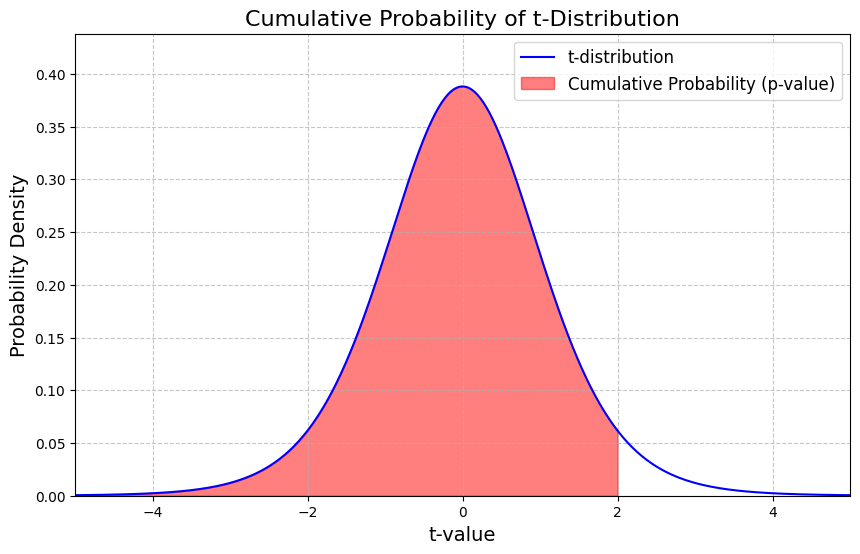

In [765]:
tcdf_plot_left(t,nu)

The cummulative probability is not even visible.

#### High Sample

Now let's look and see what happens when we have a sample which is above the value of our null hypthesis.

In [766]:
sample = [504, 510, 502, 495, 513, 527, 503, 504, 519, 521]

Almost all of our measurments are greater than 500, so intuitively we know that it is unlikely to get 10 measurements in a row that are greater than the mean.  However, our alternative hypothesis is that the mean is below 500 so we are integrating from the left.  While a streak above 500 might cause us to hesitate about our null hypothesis, it certainly doesn't support the alternative.  And the left tailed t-test only tests for values below.  

Now we will calculate the cummulative probabilty of landing on or below this t-value.

In [767]:
t,p,nu = left_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: 3.082634996626662
The p-value is: 0.99346


Let's look at the cummulative probability.

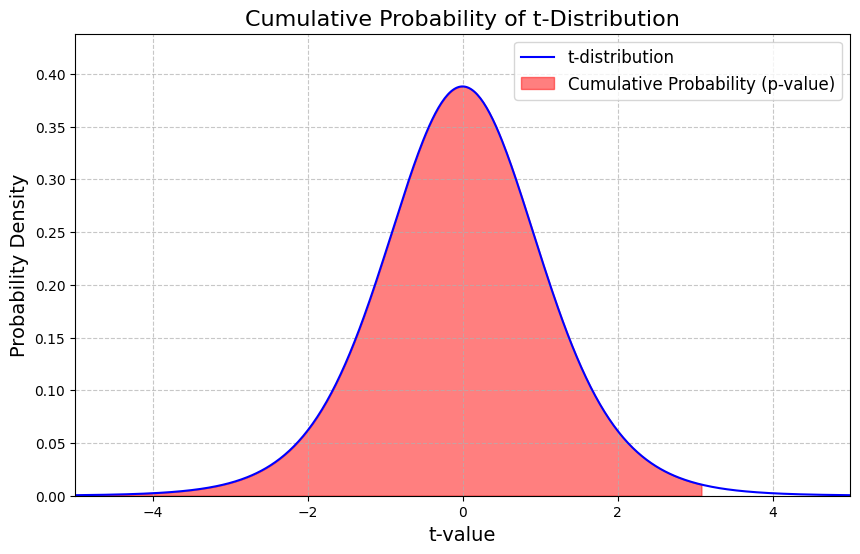

In [768]:
tcdf_plot_left(t,nu)

It is important to point out that because we only did a one-tailed test, we are not concluding that the null hypothesis is true.  Simply that we can't reject it in favor of the alternative hypothesis that the population mean is below 500.  This is why choosing a correct null and alternative hypothesis is so important.

#### Ambiguous Sample #1

Now let's look at some more ambiguous samples.

In [769]:
sample = [504, 495, 483, 495, 513, 492, 503, 504, 472, 521]

In this case it is not as obvious because we have some vales above and below the null hypothesis.  Let's run the same test and see what our p-value is.

In [770]:
t,p,nu = left_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: -0.401867594036779
The p-value is: 0.34858


Let's look at the cummulative probability.

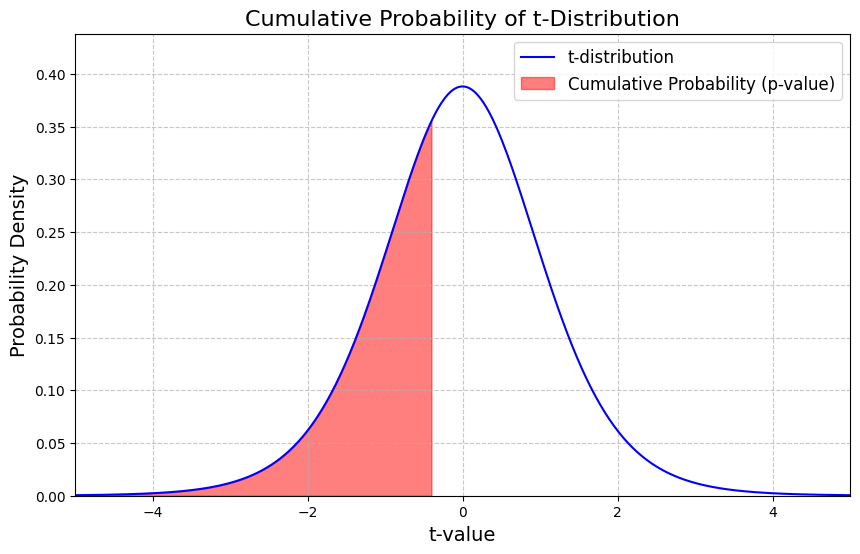

In [771]:
tcdf_plot_left(t,nu)

This p-value indicates that there is a 34.8% chance of getting this particular sample if the null hypothesis is true.  If our level of significance is 5% then we cannot reject the null hypthesis in favor of the alternative hypothesis.

#### Ambiguous Sample #2

Let's look at a sample with a few more "high" values.

In [772]:
sample = [513, 495, 503, 482, 519, 474, 501, 499, 504, 521]

Now we will calculate the cummulative probabilty of landing on or below this z-value.

In [773]:
t,p,nu = left_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: 0.23271195937169542
The p-value is: 0.5894


Now the p-value is saying that there is a 58.9% chance that we got this particular sample assuming that the null hypthesis is true, so we cannot reject it.  

Let's look at the cummulative probability.

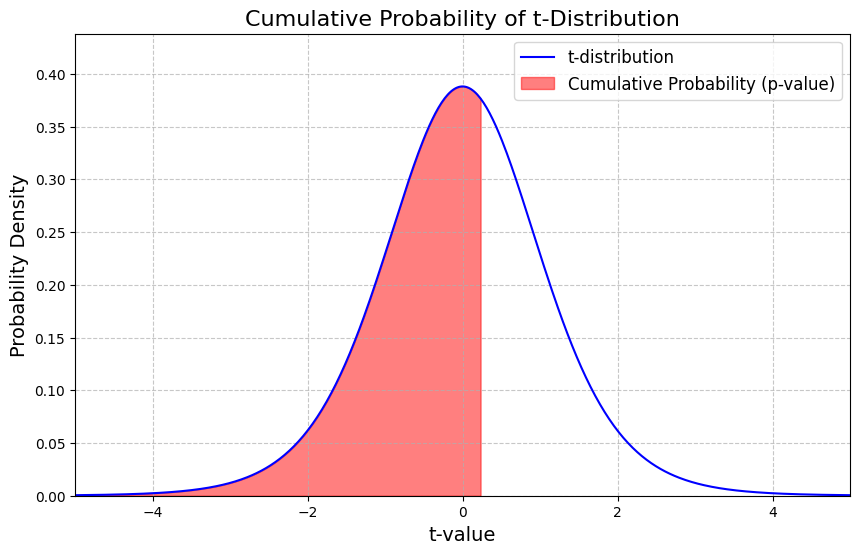

In [774]:
tcdf_plot_left(t,nu)

## Right Tailed t-test

Some of our previous results were not particularly useful.  It was obvious that the population mean was probably not equal to 500 because all our samples were above that.  Yet we got really high p-values!  Isn't the p-value the probability that we got a particular sample if the null hyptothesis is true?  Sort of... The alternative hypothesis controls how we set up the test, so high p-values really have no meaning.  Only low p-values allow us to make any sort of conclusion.  And even then we aren't proving anything, just infering that one assumption is likely false and it's probably false in a particular way.

So how do me test to see if population mean is likely to be above a certain value?  We use a right tailed t-test which just means that we calculate the cumulative probability above our calculated t-statistic.  Which is just one minus the cumulative probability below our t-statistic.

Suppose we work for a chemical company on the filling process.  We are testing some new equipment so we don't have a great estimate for the mean or standard deviation. Our goal is to get 500 grams of chemical into each container.   We take 10 measurements and we would like to know if our population mean is less than 500 grams.

First we set up our null hypthesis.
$$\Large H_0: \mu=500g$$

The null hypothesis is the default assumption.  We use this to construct our hypothestical distribution.  If our data contradicts this assumption then we reject this default hypthesis in favor of the alternative hypothesis.  In this case the alternative hypothesis is:

$$ \Large H_a: \mu > 500g$$

Now that we have our null and alternative hypothesis, we can follow some basic steps to test and see if it is likely that our null hypothesis is correct.

1. Calculate sample mean
2. Calculate t-value using the sample mean, the standard error of the mean (using sample standard deviation), and the population mean proposed by the null hypthesis.
3. Calculate the cumulative probability above that t-value.  This will tell us the likelihood of getting a result at least as extreme as our sample if the null hypthesis was true.
4. Compare this cumulative probability to our required level of significance.

Basically, the p-value is going to tell us how likely it is that we got that particular sample if the null hypothesis is true.

For the t-statistic in step (2), we use the form which describes the sample distirbution.

$$\Large t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

We'll use the same samples as before so we can see that we get the opposite results (except in the last case).

Before we get into the testing though let's build another function to visualize the p-value.

In [775]:
def tcdf_plot_right(t, nu):
    """This function visualizes the cumulative 
    probability of the t-distribution up to a defined
    t-value.  This is the p-value that will allow us
    to make an inference (or not)."""
    
    # make the figure 
    plt.figure(figsize=(10, 6))

    # outcome space
    x = np.linspace(-5, 5, num=500)

    # probability distribution
    f = st.t.pdf(x, nu)
    plt.plot(x, f, label="t-distribution", color="blue")
    
    # fill in cumulative region (p-value)
    x_fill = np.linspace(t, 5, num=500)
    f_fill = st.t.pdf(x_fill, nu)
    plt.fill_between(x_fill, f_fill, color="red", alpha=0.5, label="Cumulative Probability (p-value)")

    # Add gridlines
    plt.grid(True, linestyle="--", alpha=0.7)

    # Add labels and title
    plt.title("Cumulative Probability of t-Distribution", fontsize=16)
    plt.xlabel("t-value", fontsize=14)
    plt.ylabel("Probability Density", fontsize=14)

    # Add legend
    plt.legend(fontsize=12)

    # Format plot
    plt.ylim(0, max(f) + 0.05)
    plt.xlim(-5, 5)
    plt.show()

Now let's use our function to gain some intution about how the t-statistic impacts p-value.  In this case we are testing for values above the assumed population mean in the null hypothesis.  The p-value is the cumulative probability shown in red.  Test several values of `t`.  Looking at the t-statistic above, what could happpen to make `t` higher or lower?  Keep in mind that $\mu$ will be a constant because we have made an assumption about it's value.

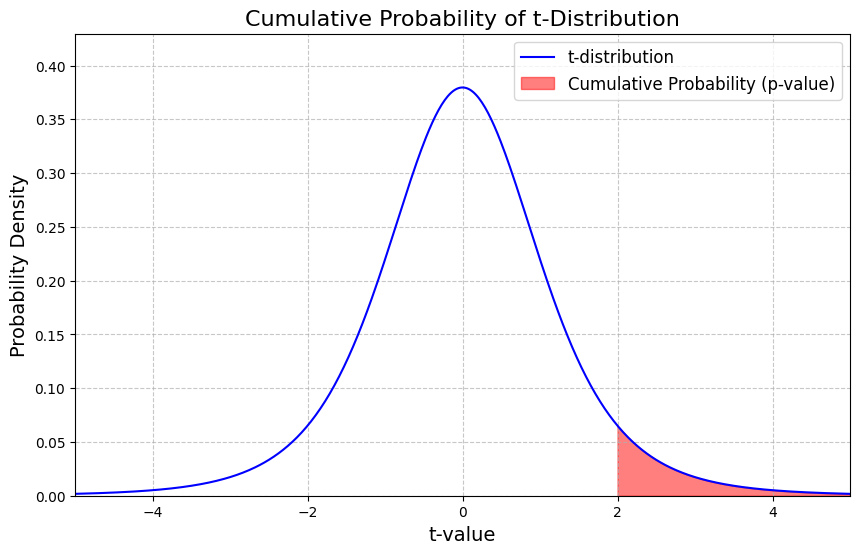

In [776]:
t = 2
nu = 5

tcdf_plot_right(t,nu)

Now let's build a function to do the right tailed t-test.

In [777]:
def right_tailed_t_test(sample,mu_0):
    """
    This function calculates a p-value using a 
    right-tailed t-test for the population mean.  
    
    It takes two values as input.
    
    sample: a list of numbers
    mu_0: The value of the null hyothesis for population mean
    
    """    
    # sample mean
    sample_mean = np.mean(sample)

    # sample standard deviation with n-1 in the denominator
    sample_std = np.std(sample, ddof=1)
    
    # number of measurements (length of sample list)
    sample_len = len(sample) 
    
    # degree of freedom
    # ? 
    nu = sample_len - 1

    # t-value for sample mean distribution (using standard error)
    t_numerator = sample_mean - mu_0
    t_denomenator = sample_std / (np.sqrt(sample_len))
    t_value = t_numerator / t_denomenator
    
    
    # calculate the cummulative probability of landing
    # on or below this t-value
    p_value = st.t.cdf(t_value, nu)
#    p_value = 1 - p_value
    p_value = np.round(p_value, 5)
    
    # return three values
    return t_value, p_value, nu

#### Low Sample

In [778]:
sample = [487, 495, 482, 474, 489, 499, 492, 485, 483, 497]

Almost all of our measurments are less than 500, so intuitively we know that it is unlikely to get 10 measurements in a row that are less than the mean.  But since our alternative hypothesis for a right-tailed test is that the population mean is greater than the null value, we aren'y likely to get useful inference here.

Now we will calculate the cummulative probabilty of landing on or above this t-value.  We do this by calculating the cumulative probability on the high side.

In [779]:
t, p, nu = right_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: -4.802814658751769
The p-value is: 0.00048


This is an extrememly high probability so we cannot reject the null hypthesis in favor of the alternative hypthesis.  This does not prove the null hypothesis.  We can look at the data and see that it is unlikely to be correct, but we only tested for values greater than the null value.

Let's look at the p-value on the plot.

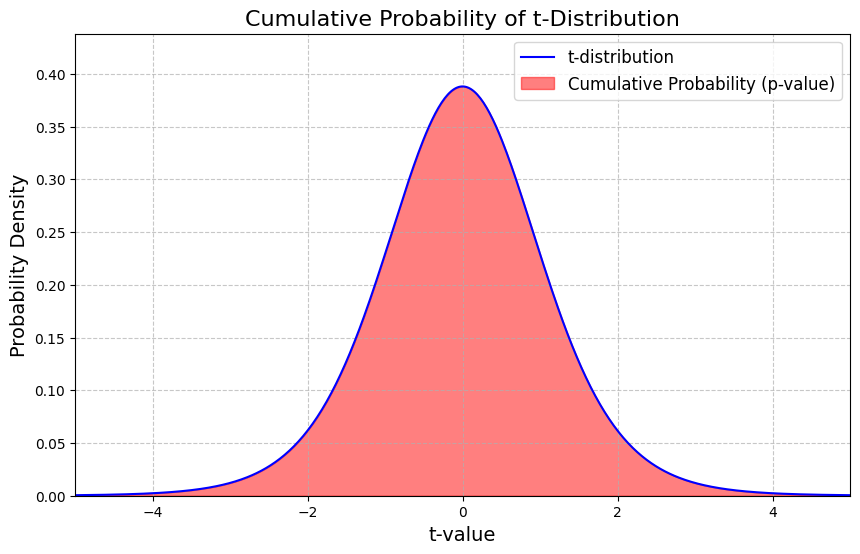

In [780]:
tcdf_plot_right(t,nu)

#### High Sample

Now let's look and see what happens when we have a sample which is above the value of our null hypthesis.

In [781]:
sample = [504, 510, 502, 495, 513, 527, 503, 504, 519, 521]

Almost all of our measurments are greater than 500, so intuitively we know that it is unlikely to get 10 measurements in a row that are greater than the mean.  

Now we will calculate the cummulative probabilty of landing on or above this t-value.

In [782]:
t,p,nu = right_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: 3.082634996626662
The p-value is: 0.99346


This is a pretty low probability so we can reject $H_0$ in favor of $H_a$, that the mean is greater than 500g.

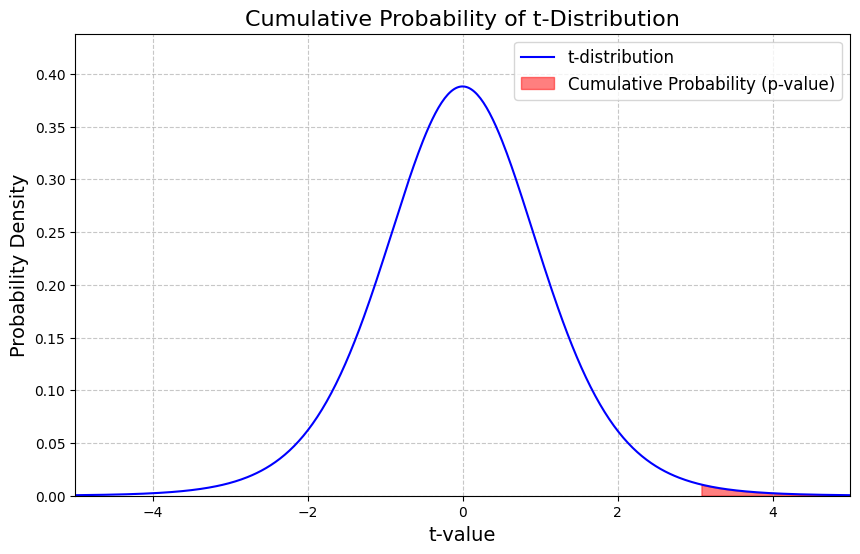

In [783]:
tcdf_plot_right(t,nu)

#### Ambiguous Sample #1

Now let's look at some more ambiguous samples.

In [784]:
sample = [487, 495, 503, 482, 519, 474, 489, 499, 504, 521]

In this case it is not as obvious because we have some values above and below the null hypothesis.  Let's run the same test and see what our p-value is.

Now we will calculate the cummulative probabilty of landing on or above this t-value.

In [785]:
t,p,nu = right_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: -0.5629753196806545
The p-value is: 0.2936


This p-value indicates that there is a 70.6% chance of getting this particular sample if the null hypothesis is true. We cannot reject the null hypothesis.

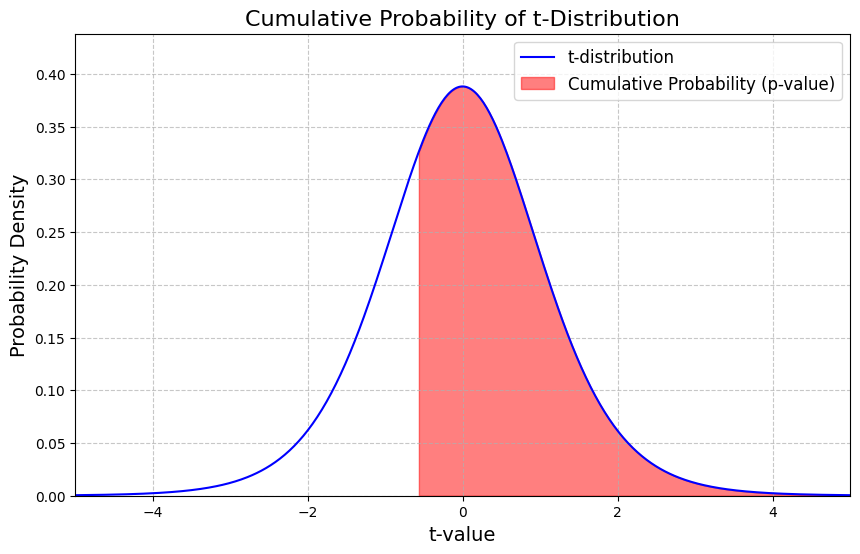

In [786]:
tcdf_plot_right(t,nu)

#### Ambiguous Sample #2

Let's look at a sample with a few more "high" values.

In [787]:
sample = [513, 495, 503, 482, 519, 474, 501, 499, 504, 521]

Now we will calculate the cummulative probabilty of landing on or above this z-value.

In [788]:
t,p,nu = right_tailed_t_test(sample,500)
print("The t-value is: {}".format(t))
print("The p-value is: {}".format(p))

The t-value is: 0.23271195937169542
The p-value is: 0.5894


Now the p-value is saying that there is a ~41% chance that we got this particular sample assuming that the null hypthesis is true, so we cannot reject it.  

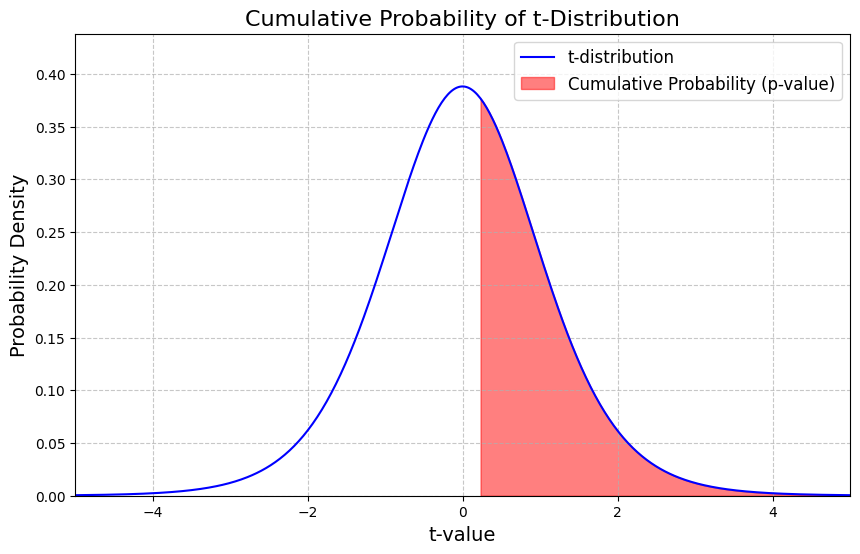

In [789]:
tcdf_plot_right(t,nu)

# Hypothesis Testing in the Wild!

It's all fun and games to make up samples full of measurements that give us interesting (or purposefully uninteresting) conclusions.  But what happens when we apply this stuff to actual data?  Let's go back to the penguins to find out.  

You should have code in previous studios (Week 03) that will let you load the penquin data set, isolate species, calculate summaray statistics, and grab a single sample of 5 measurements.  

For each species choose a factor and set up both a left tailed and right tailed test using a sample of 5 measurements.  Use your summary stats to guide you in setting up your null and alternative hypothesis.  Now repeat this process several times paying careful attention to how your p-value changes.  If you are only getting high (bad!) p-values, consider adjusting your null and alternative hypothesis.  Also if all of your p-values are staggeringly low, consider finding the edge, where a few are above 0.05 and a few are below.  The try this for many samples and gain some intution about how the sample influences the outcome.  If we assume the mean of the whole data set is an accurate representation of the population, how likely are we to make the right conclusion if we only have one sample of 5 measurements?

The pro-move here is to loop around it once you get it working and make a histogram to understand the behavior at a high level.



Left-Tailed Test for Adelie (culmen_length_mm):
t-value: -0.7105787091265686, p-value: 0.2415106324744723


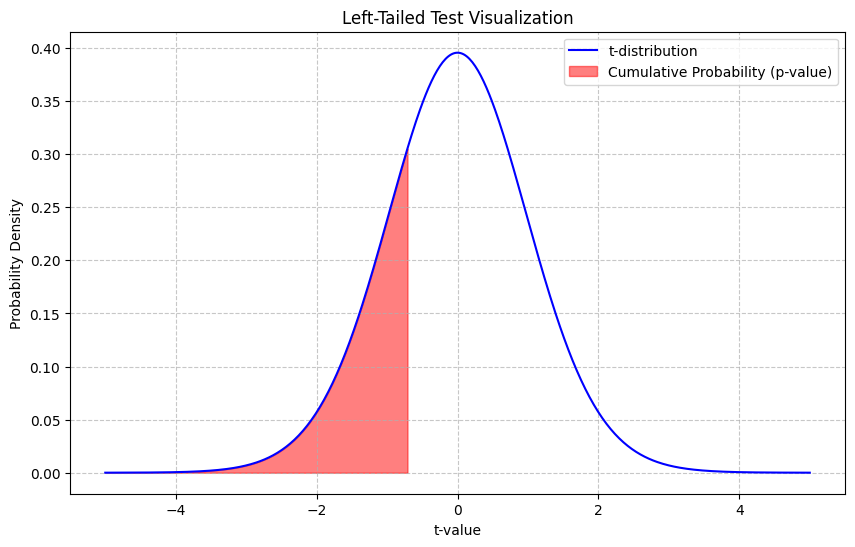

Right-Tailed Test for Gentoo (flipper_length_mm):
t-value: 0.2656174018034197, p-value: 0.3962065392198646


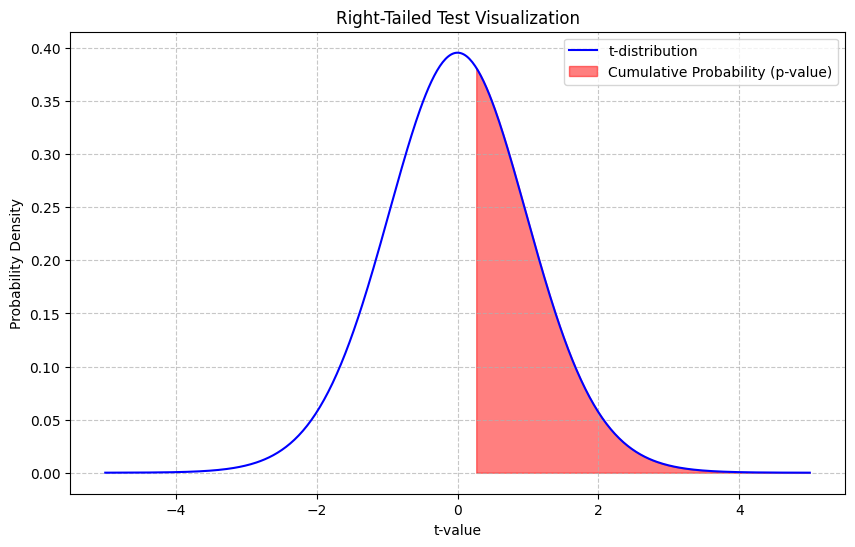

In [790]:
# Load the penguin dataset
import os

script_directory = os.path.dirname('__file__')

penguin_location = os.path.join(script_directory, 'penguins_size.csv')

penguin_data = pd.read_csv(penguin_location)

# Function to sample data for a specific species and feature
def sample_penguin_data(data, species, feature, n=30):
    """
    Samples data for a specific species and feature.
    """
    species_data = data[data["species"] == species][feature].dropna()
    sample = species_data.sample(n=n, random_state=np.random.randint(1000))
    return sample

# Left-tailed t-test function (from current file)
def left_tailed_t_test(sample, mu_0):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_len = len(sample)
    nu = sample_len - 1
    t_value = (sample_mean - mu_0) / (sample_std / np.sqrt(sample_len))
    p_value = st.t.cdf(t_value, nu)
    return t_value, p_value, nu

# Right-tailed t-test function (from current file)
def right_tailed_t_test(sample, mu_0):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_len = len(sample)
    nu = sample_len - 1
    t_value = (sample_mean - mu_0) / (sample_std / np.sqrt(sample_len))
    p_value = 1 - st.t.cdf(t_value, nu)
    return t_value, p_value, nu

# Visualization functions (from current file)
def tcdf_plot_left(t, nu):
    x = np.linspace(-5, 5, num=500)
    f = st.t.pdf(x, nu)
    plt.figure(figsize=(10, 6))
    plt.plot(x, f, label="t-distribution", color="blue")
    x_fill = np.linspace(-5, t, num=500)
    f_fill = st.t.pdf(x_fill, nu)
    plt.fill_between(x_fill, f_fill, color="red", alpha=0.5, label="Cumulative Probability (p-value)")
    plt.title("Left-Tailed Test Visualization")
    plt.xlabel("t-value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

def tcdf_plot_right(t, nu):
    x = np.linspace(-5, 5, num=500)
    f = st.t.pdf(x, nu)
    plt.figure(figsize=(10, 6))
    plt.plot(x, f, label="t-distribution", color="blue")
    x_fill = np.linspace(t, 5, num=500)
    f_fill = st.t.pdf(x_fill, nu)
    plt.fill_between(x_fill, f_fill, color="red", alpha=0.5, label="Cumulative Probability (p-value)")
    plt.title("Right-Tailed Test Visualization")
    plt.xlabel("t-value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

# Hypothesis testing for penguin data
def hypothesis_test_penguins(data, species, feature, mu_0, test_type, n):
    """
    Performs hypothesis testing on penguin data for a specific species and feature.
    """
    # Sample data
    sample = sample_penguin_data(data, species, feature, n=n)
    
    # Perform t-test
    if test_type == "left":
        t_value, p_value, nu = left_tailed_t_test(sample, mu_0)
        print(f"Left-Tailed Test for {species} ({feature}):")
        print(f"t-value: {t_value}, p-value: {p_value}")
        tcdf_plot_left(t_value, nu)
    elif test_type == "right":
        t_value, p_value, nu = right_tailed_t_test(sample, mu_0)
        print(f"Right-Tailed Test for {species} ({feature}):")
        print(f"t-value: {t_value}, p-value: {p_value}")
        tcdf_plot_right(t_value, nu)
    else:
        print("Invalid test type. Choose 'left' or 'right'.")


# Test if the mean culmen length of Adelie penguins is less than 39 mm
hypothesis_test_penguins(
    penguin_data, 
    species="Adelie", 
    feature="culmen_length_mm", 
    mu_0=39, 
    test_type="left", 
    n=30, 
    )

# Test if the mean flipper length of Gentoo penguins is greater than 215 mm
hypothesis_test_penguins(
    penguin_data, 
    species="Gentoo", 
    feature="flipper_length_mm", 
    mu_0=215, 
    test_type="right", 
    n=30, 
    )